### Importing Packages

In [4]:
pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mahotas
import mahotas.demos
import mahotas as mh
import numpy as np
import cv2 
from pylab import imshow, show
from mahotas.features import surf

### Read image

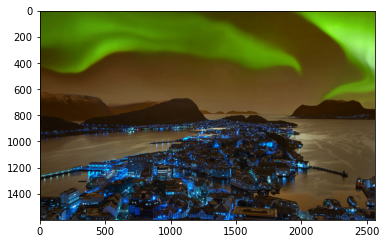

In [3]:
img = cv2.imread(r'C:\Users\uthri\Pictures\Default.jpg')
imshow(img)

### Surf Function

In [4]:
def sur(gray):
    f = gray.astype(np.uint8)
    spoints = surf.surf(f)
    print("Nr points:", len(spoints))
    from sklearn.cluster import KMeans
    km = KMeans(  n_clusters=5, init='random',
                n_init=10, max_iter=300, 
                tol=1e-04, random_state=0
            )         
    values = km.fit_predict(spoints)
    colors = np.array([(255-52*i,25+52*i,37**i % 101) for i in range(5)])
    img2 = surf.show_surf(f, spoints, values, colors)
    imshow(img2)
        


### 1) Scaling

In [5]:
scale_factor=2
new_width=int(img.shape[1]*scale_factor)
new_height=int(img.shape[0]*scale_factor)
resized_img=cv2.resize(img,(new_width,new_height))
scale=cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)

In [13]:
sur(scale)

AttributeError: 'numpy.ndarray' object has no attribute 'split'

### 2) Rotating the image

#### Rotate the imaage using the below information

In [14]:
angle = 45
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
scale=1.0


In [15]:
M = cv2.getRotationMatrix2D(center, angle, scale)
rotated_img = cv2.warpAffine(img, M, (w, h))#When rotating an image, an affine transformation matrix is used to map the original image to a rotated image
rotate=cv2.cvtColor(rotated_img,cv2.COLOR_BGR2GRAY)

In [16]:
sur(rotate)

AttributeError: 'numpy.ndarray' object has no attribute 'split'

### 3) Affine Transformation

In [11]:
src_pts = np.float32([[0, 0], [0, img.shape[0] - 1], [img.shape[1] - 1, 0]])
dst_pts = np.float32([[50, 50], [50, img.shape[0] - 51], [img.shape[1] - 51, 50]])

AttributeError: 'NoneType' object has no attribute 'shape'

In [12]:
M, _ = cv2.estimateAffine2D(src_pts, dst_pts)
out = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
aff=cv2.cvtColor(out,cv2.COLOR_BGR2GRAY)

NameError: name 'src_pts' is not defined

In [13]:
sur(aff)

NameError: name 'aff' is not defined

### 4) Perspective 

#### Inorder to find matching between 2 points we use a sift

In [7]:
sift=cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img, None)
kp2, des2 = sift.detectAndCompute(img, None)

#### MatchMaker

In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [24]:
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

In [25]:
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

In [26]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
result = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
per=cv2.cvtColor(result,cv2.COLOR_BGR2GRAY)

In [17]:
sur(per)

NameError: name 'per' is not defined